# Task 4 - Change of patterns throughout the dataset

This code will produce a horizontal stacked bar chart where each bar represents a month, and the segments within each bar show the distribution of check-ins across different venue types.

/var/folders/5b/lx_h1w013634ddq6xwrjnf500000gn/T/ipykernel_99511/3407417703.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['timestamp'].dt.to_period('M')


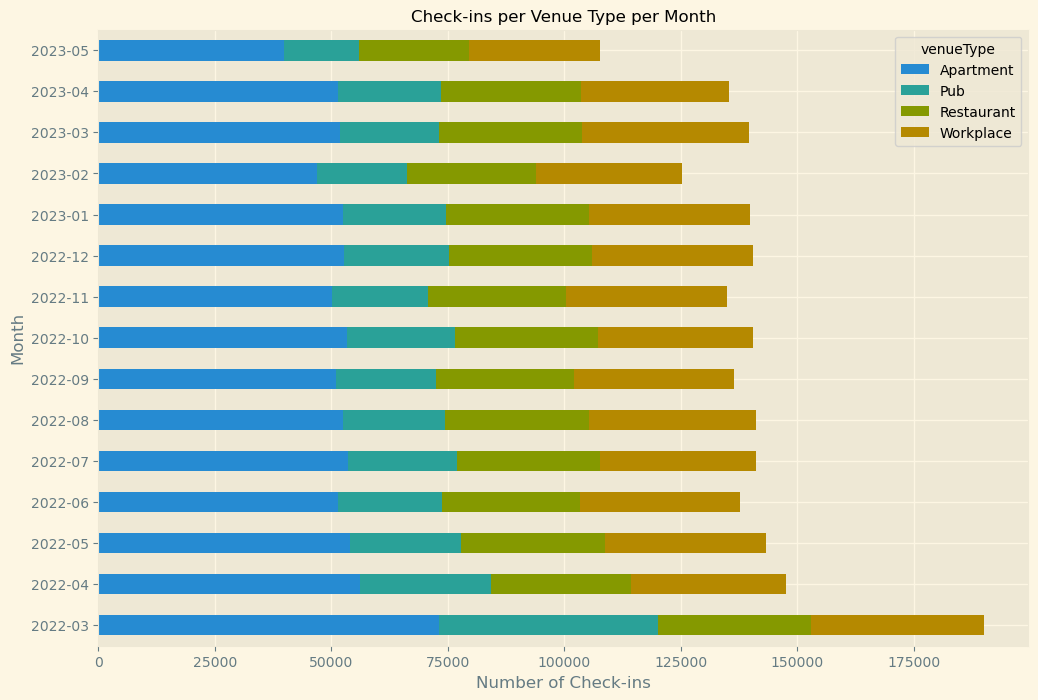

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../Datasets/Journals/CheckinJournal.csv')

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])



# Extract year-month from the timestamp for grouping
df['year_month'] = df['timestamp'].dt.to_period('M')

# Group by venue type and year-month, and count the number of check-ins
checkin_counts = df.groupby(['venueType', 'year_month']).size().unstack(fill_value=0)

# Plotting
with plt.style.context('Solarize_Light2'):	
	checkin_counts.T.plot(kind='barh', stacked=True, figsize=(12, 8))

# Add title and labels
plt.title('Check-ins per Venue Type per Month')
plt.xlabel('Number of Check-ins')
plt.ylabel('Month')

# Show the plot

plt.show()


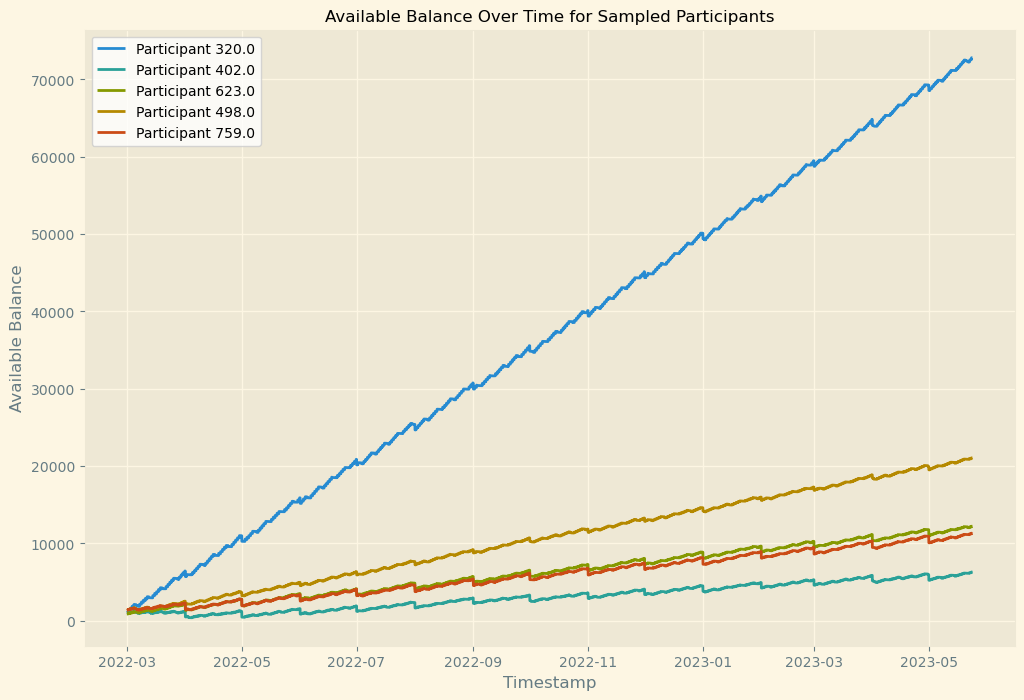

In [8]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Get a list of file paths for all CSV files in the folder
csv_files = glob.glob('../Datasets/Activity Logs/*.csv')

# Read each CSV file and store the data in a list of dataframes
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dataframes)

# Sample 5 participant IDs
sample_participantIds = combined_df['participantId'].sample(n=5, random_state=42)

# Filter the dataframe to include only the sampled participant IDs
combined_df = combined_df[combined_df['participantId'].isin(sample_participantIds)]

# Ensure the timestamp column is in datetime format
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'])

# Sort the dataframe by timestamp
combined_df = combined_df.sort_values('timestamp')

# Plotting availableBalance over time for each participant
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(12, 8))
    for participant_id in sample_participantIds:
        participant_df = combined_df[combined_df['participantId'] == participant_id]
        plt.plot(participant_df['timestamp'], participant_df['availableBalance'], label=f'Participant {participant_id}')

# Add title and labels
plt.title('Available Balance Over Time for Sampled Participants')
plt.xlabel('Timestamp')
plt.ylabel('Available Balance')
plt.legend()

# Show the plot
plt.show()
